In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('smoke_detection_iot.csv')

In [3]:
data.head(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
data.shape

(62630, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [6]:
def data_proflileing(df):
    data_profile = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column','dtype','nunique','null','duplicates']
    return data_profile_finding

In [7]:
data_proflileing(data)

,column,dtype,nunique,null,duplicates
0,Unnamed: 0,int64,62630,0,0
1,UTC,int64,62630,0,0
2,Temperature[C],float64,21672,0,40958
3,Humidity[%],float64,3890,0,58740
4,TVOC[ppb],int64,1966,0,60664
5,eCO2[ppm],int64,1713,0,60917
6,Raw H2,int64,1830,0,60800
7,Raw Ethanol,int64,2659,0,59971
8,Pressure[hPa],float64,2213,0,60417
9,PM1.0,float64,1337,0,61293


# EDA

In [8]:
numeric_features = [i for i in data.columns if data[i].dtype!='O']
categorical_features = [i for i in data.columns if data[i].dtype=='O']

<Axes: xlabel='Fire Alarm', ylabel='count'>

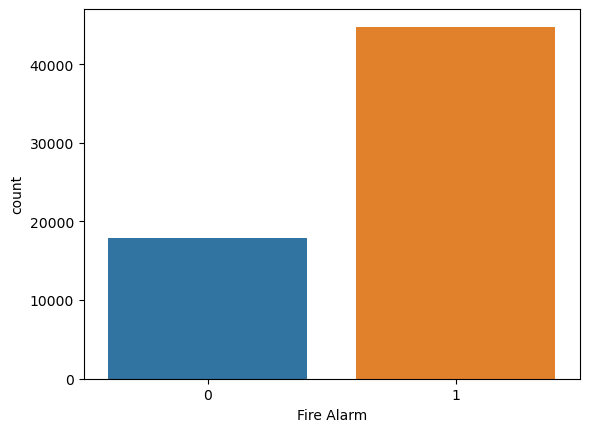

In [9]:
sns.countplot(data=data,x="Fire Alarm")

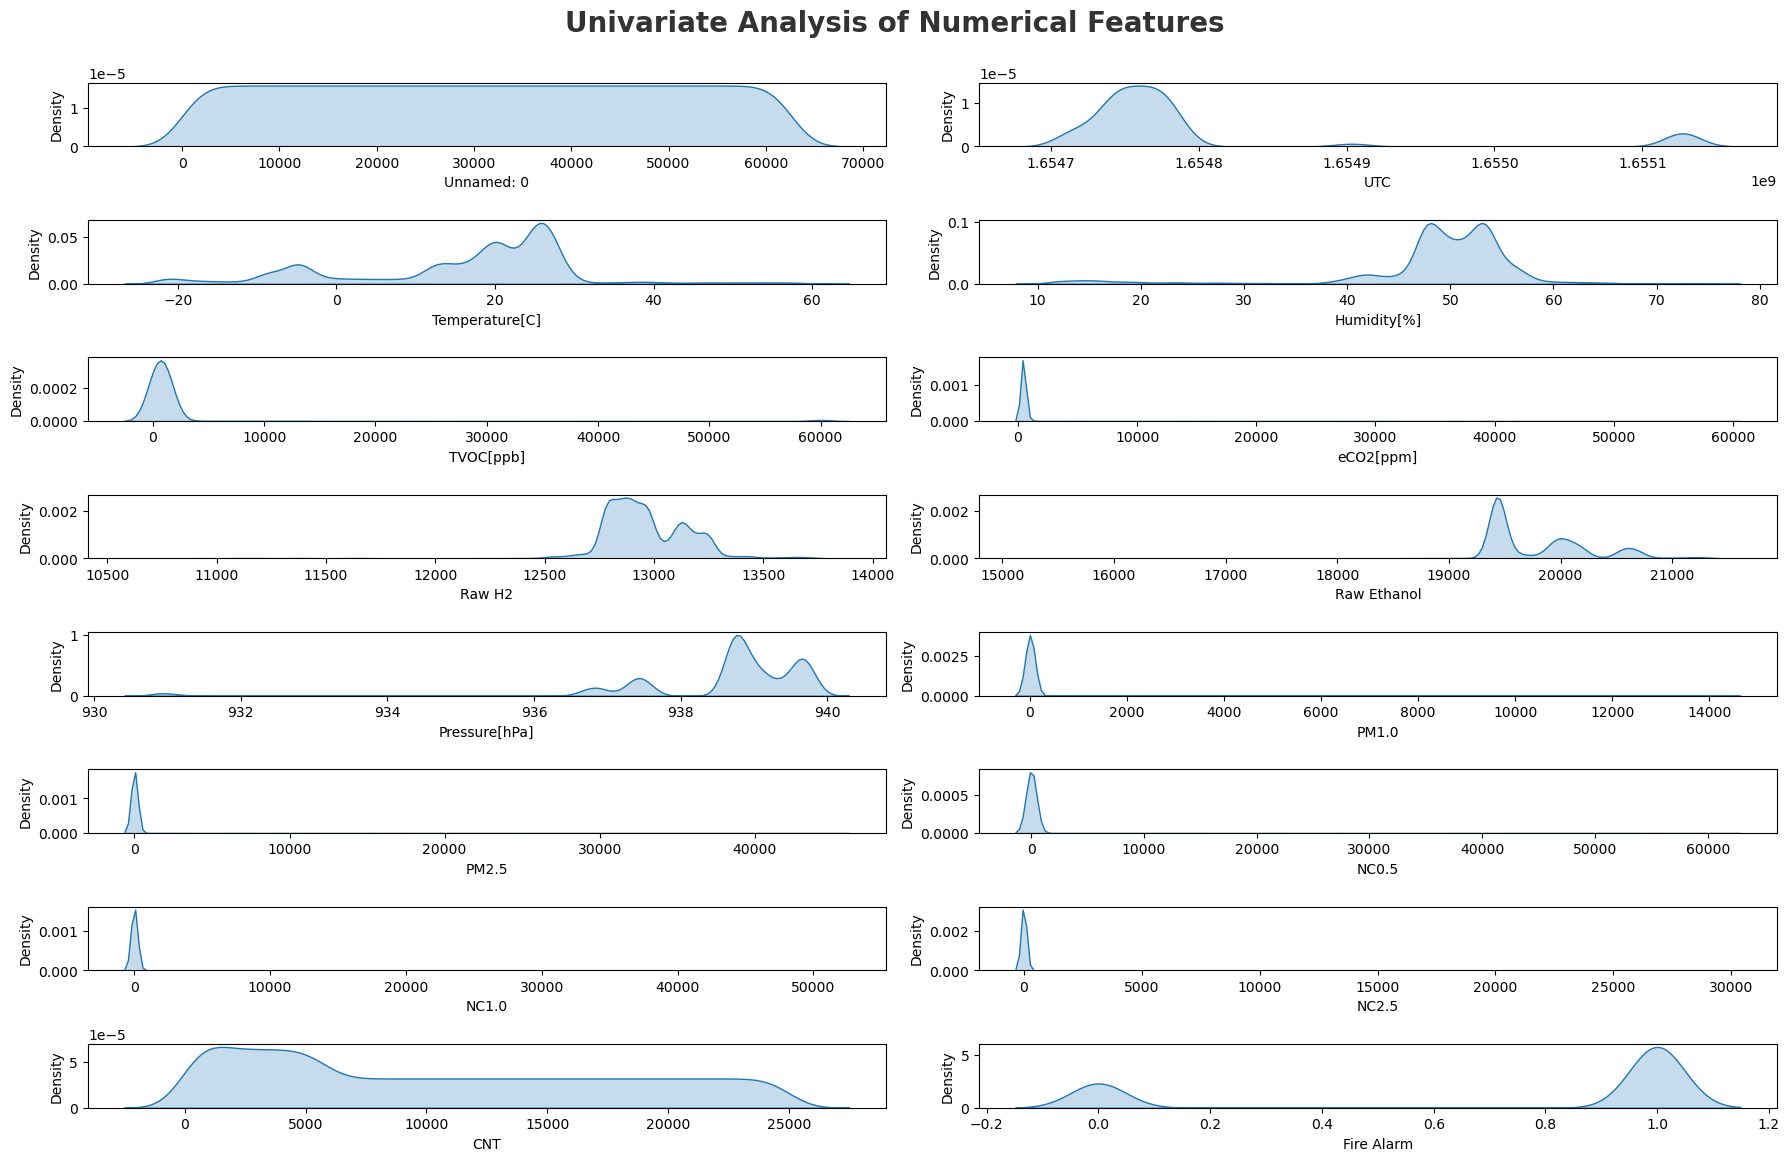

In [10]:
plt.figure(figsize=(18,18))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(13, 2, i+1)
    sns.kdeplot(x=data[numeric_features[i]],shade=True,data=data)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<Axes: xlabel='TVOC[ppb]', ylabel='NC0.5'>

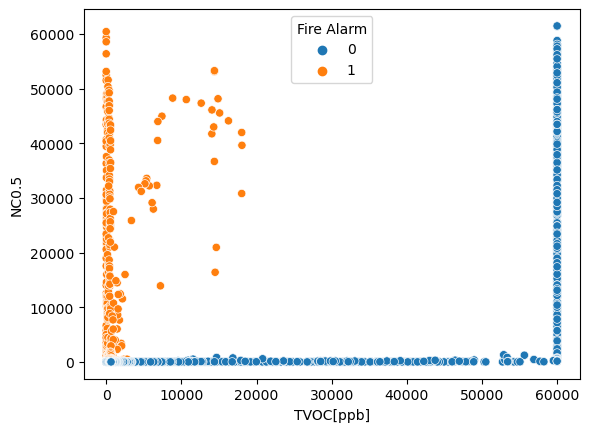

In [11]:
sns.scatterplot(x = 'TVOC[ppb]' , y  = 'NC0.5' , hue = 'Fire Alarm' , data = data)


<Axes: xlabel='eCO2[ppm]', ylabel='NC0.5'>

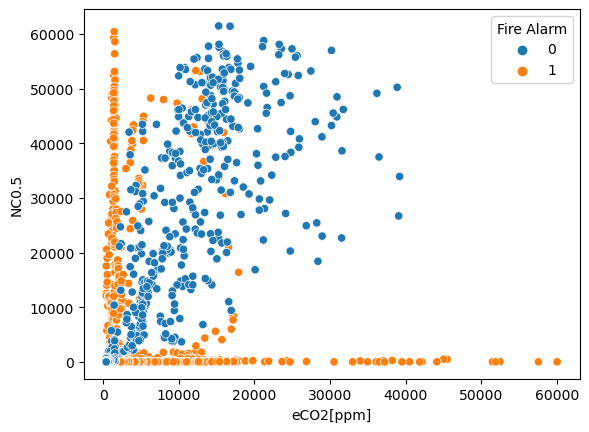

In [12]:
sns.scatterplot(x = 'eCO2[ppm]' , y  = 'NC0.5' , hue = 'Fire Alarm' , data = data)

<Axes: xlabel='Raw H2', ylabel='Raw Ethanol'>

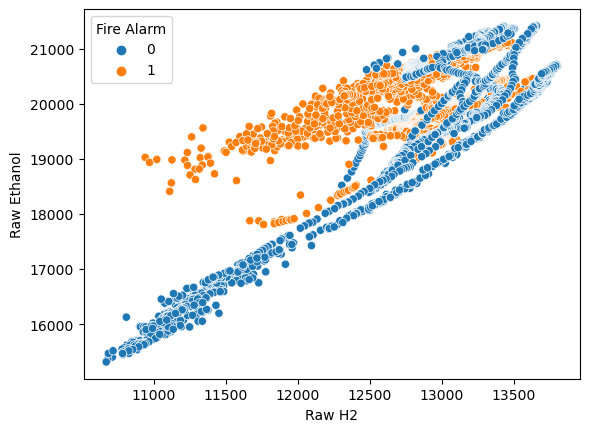

In [13]:
sns.scatterplot(x = 'Raw H2' , y  = 'Raw Ethanol' , hue = 'Fire Alarm' , data = data )

- 1.UTC: Time when experiment was performed
- 2.Temperature[C]: Temperature of surroundings, measured in celcius
- 3.Humidity[%]: Air humidity during the experiment
- 4.TVOC[ppb]: Total Volatile Organic Compounds, measured in ppb (parts per billion)
- 5.eCO2[ppm]: CO2 equivalent concentration, measured in ppm (parts per million)
- 6.Raw H2: The amount of Raw Hydrogen [Raw Molecular Hydrogen; not compensated (Bias, Temperature etc.)] present in surroundings
- 7.Raw Ethanol: The amount of Raw Ethanol present in surroundings
- 8.Pressure[hPa]: Air pressure, Measured in hPa
- 9.PM1.0: Paticulate matter of diameter less than 1.0 micrometer
- 10.PM2.5: Paticulate matter of diameter less than 2.5 micrometer
- 11.NC0.5: Concentration of particulate matter of diameter less than 0.5 micrometer
- 12.NC1.0: Concentration of particulate matter of diameter less than 1.0 micrometer
- 13.NC2.5: Concentration of particulate matter of diameter less than 2.5 micrometer
- 14. CNT: Sample Count. Fire Alarm(Reality) If fire was present then value is 1 else it is 0
- 15. Fire Alarm: 1 means Positive and 0 means Not Positive

<Axes: >

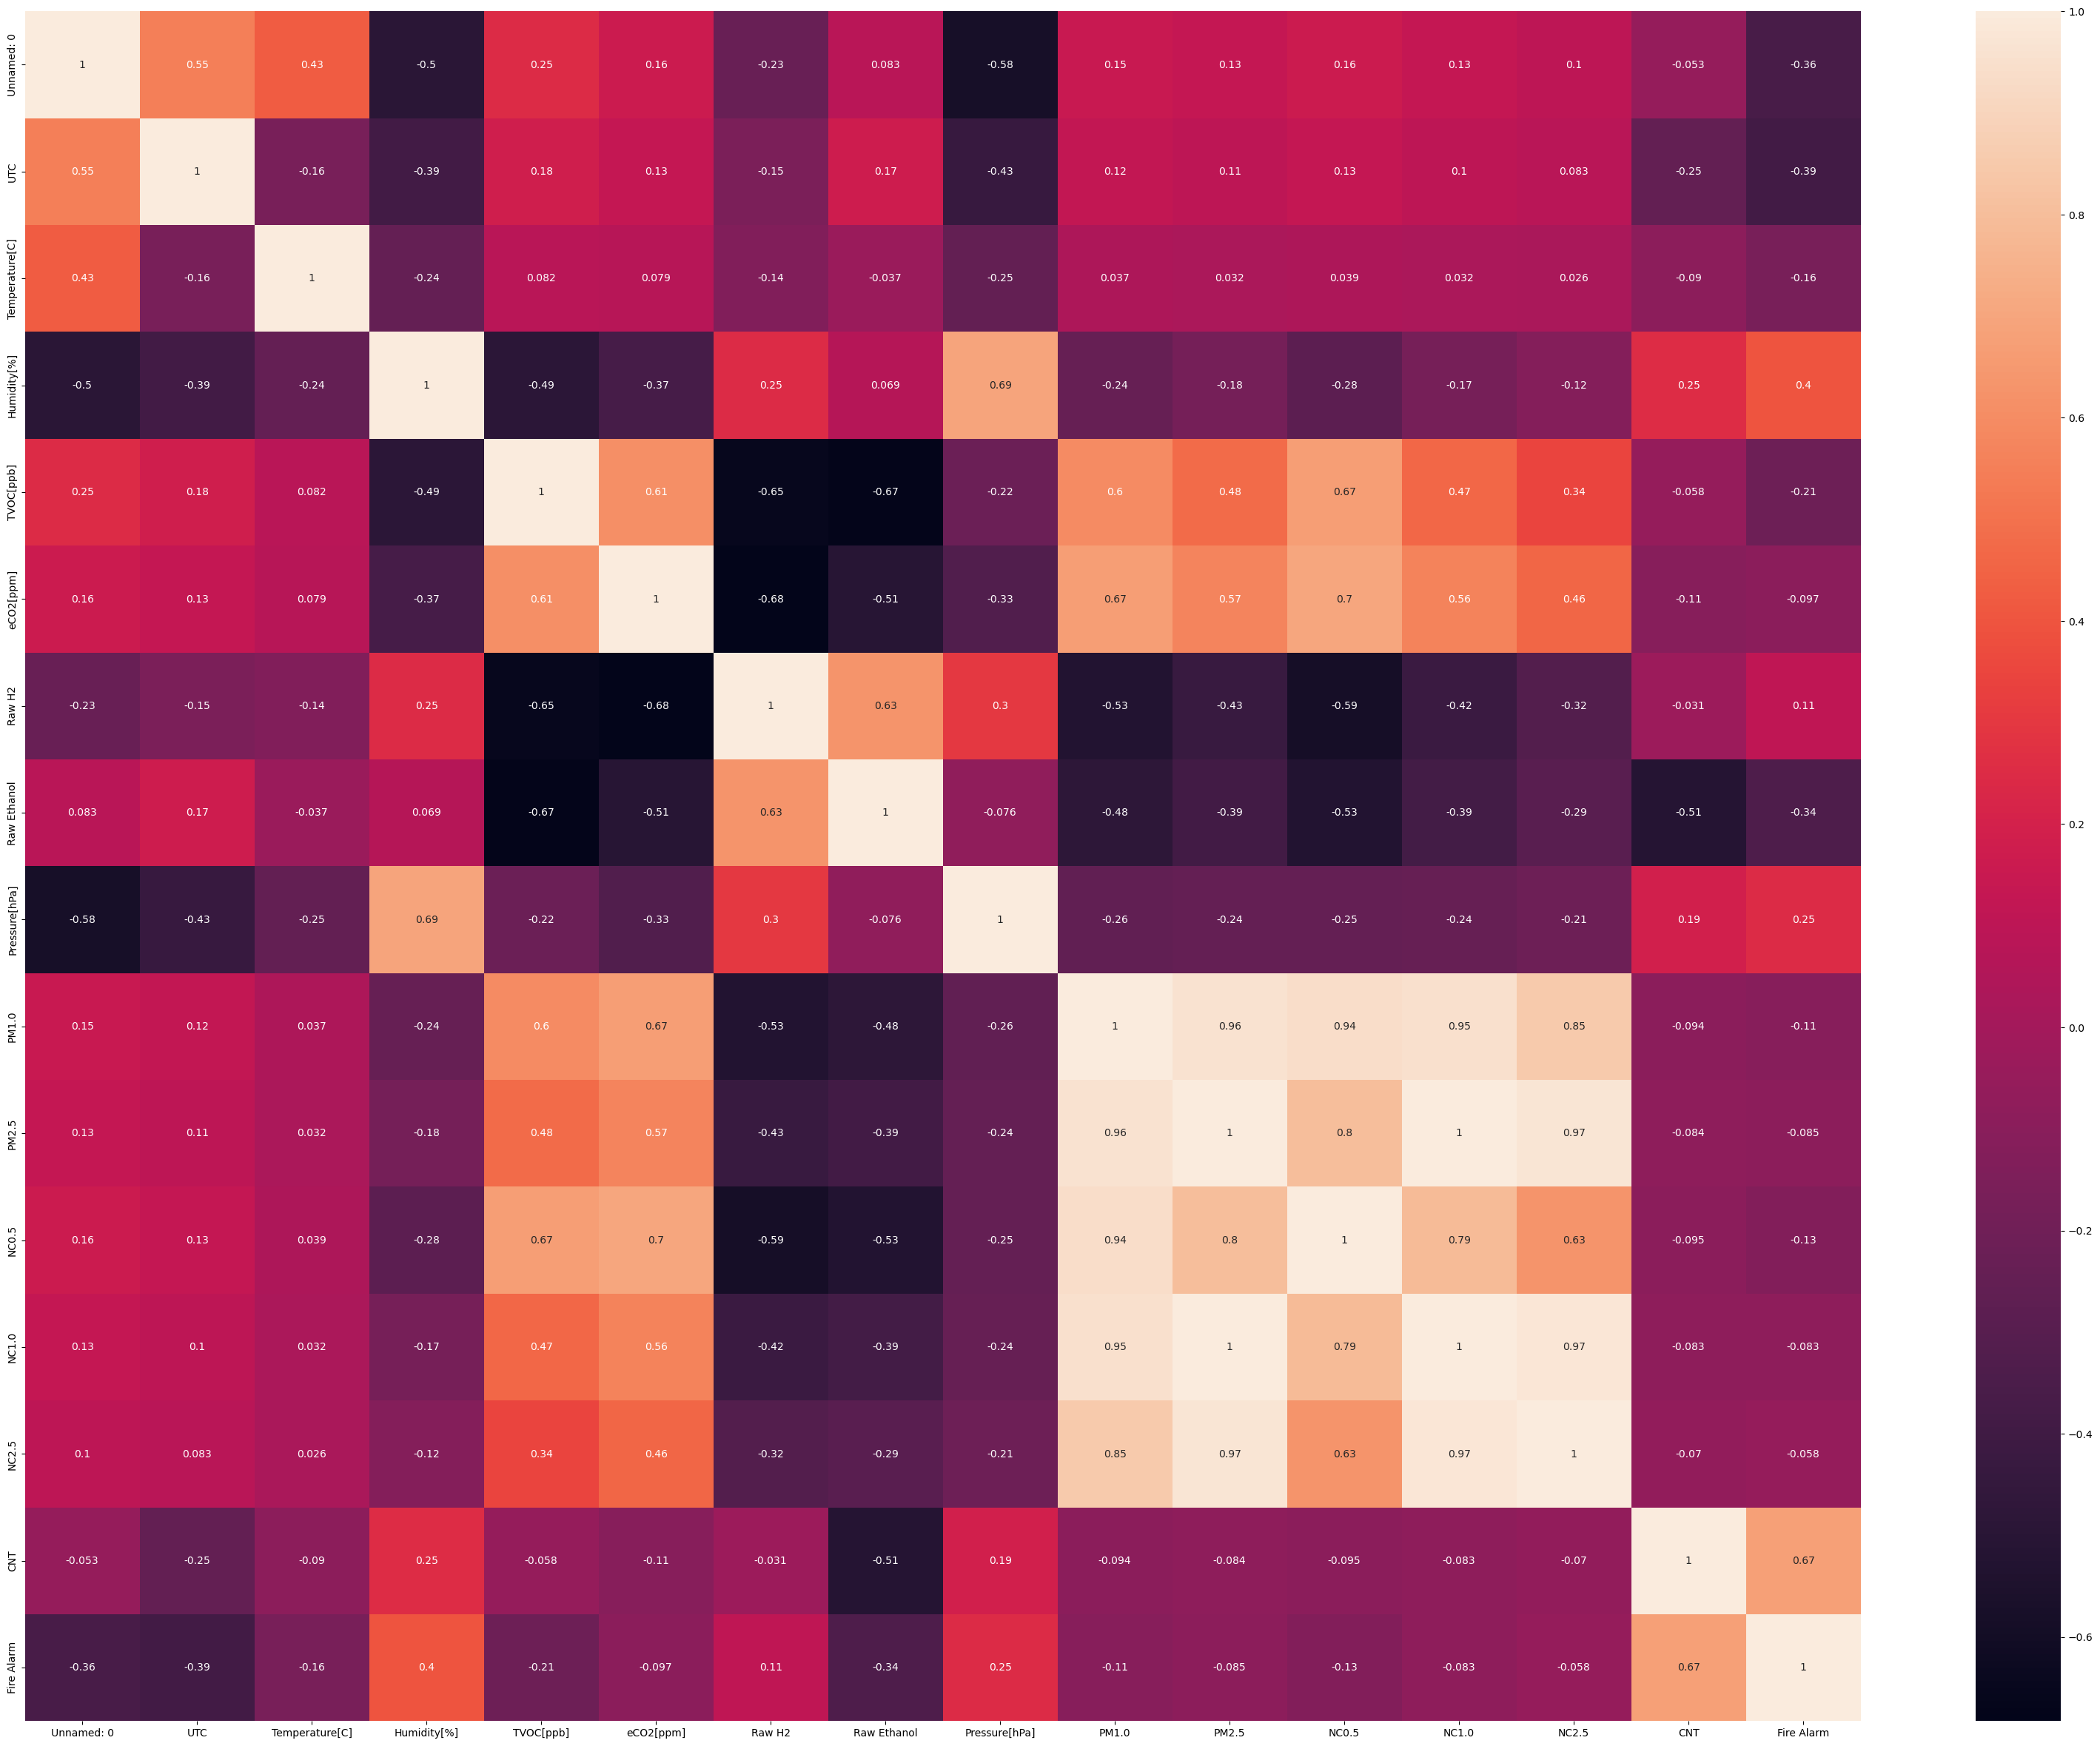

In [14]:
plt.figure(figsize=(40,30))
sns.heatmap(data.corr(), annot=True)

# Spliting the data Train and Test set

In [15]:
X = data.drop(['Unnamed: 0','UTC','CNT','Fire Alarm'],axis=1)
y = data['Fire Alarm']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Handle Imbalance datasets

In [17]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek


## 1. Over Sampling

In [18]:
os=RandomOverSampler(sampling_strategy='minority')

In [19]:
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [20]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({1: 31317, 0: 12524})
The number of classes after fit Counter({1: 31317, 0: 31317})


## 2. SMOTETomek

In [21]:
sm_tet=SMOTETomek()

In [22]:
X_train_smtet,y_train_smtet=sm_tet.fit_resample(X_train,y_train)

In [23]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smtet)))

The number of classes before fit Counter({1: 31317, 0: 12524})
The number of classes after fit Counter({1: 31317, 0: 31317})


# Scaling of numerical columns

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [25]:
#sc = StandardScaler()
#min_max = MinMaxScaler()
ro = RobustScaler()

In [26]:
X_train_os=ro.fit_transform(X_train_os)
X_train_smtet=ro.fit_transform(X_train_smtet)
X_test=ro.transform(X_test)

# Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [28]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()
    
    algos = [g,b,kc,lr,dc,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]
    
    result = pd.DataFrame(index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))
        
        
        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))
        
    
    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall    
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
        
    return result.sort_values('Test_Accuracy Score', ascending=False)

In [29]:
classalgo_test(X_train_os,X_test,y_train_os,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.999787,0.999777,0.999851,0.999787,0.999682
BaggingClassifier,1.000000,1.000000,1.000000,1.000000,0.999361,0.999182,0.999554,0.999361,0.998935
XGBClassifier,0.999968,0.999968,0.999968,0.999968,0.999361,0.999182,0.999554,0.999361,0.998935
GradientBoostingClassifier,0.999856,0.999840,0.999856,0.999856,0.999308,0.999108,0.999517,0.999308,0.998841
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.999148,0.998885,0.999405,0.999148,0.998561
AdaBoostClassifier,0.999617,0.999681,0.999617,0.999617,0.999042,0.998959,0.999331,0.999042,0.998543
KNeighborsClassifier,0.998020,0.999456,0.998017,0.998020,0.996328,0.999179,0.997429,0.996328,0.996814
LogisticRegression,0.806974,0.734481,0.832817,0.806974,0.872532,0.874077,0.915080,0.872532,0.806289
BernoulliNB,0.847224,0.909228,0.834701,0.847224,0.806536,0.960718,0.849051,0.806536,0.841247
GaussianNB,0.550867,0.527086,0.687881,0.550867,0.740327,0.737002,0.845116,0.740327,0.551193


In [30]:
classalgo_test(X_train_smtet,X_test,y_train_smtet,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.999947,1.000000,0.999963,0.999947,0.999963
BaggingClassifier,1.000000,1.000000,1.000000,1.000000,0.999947,0.999926,0.999963,0.999947,0.999907
XGBClassifier,0.999984,1.000000,0.999984,0.999984,0.999840,0.999851,0.999888,0.999840,0.999776
DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,0.999627,0.999926,0.999740,0.999627,0.999683
GradientBoostingClassifier,0.999824,0.999808,0.999824,0.999824,0.999574,0.999702,0.999702,0.999574,0.999477
AdaBoostClassifier,0.999617,0.999521,0.999617,0.999617,0.999308,0.999405,0.999516,0.999308,0.999066
KNeighborsClassifier,0.997972,0.999232,0.997970,0.997972,0.996434,0.999179,0.997503,0.996434,0.996888
LogisticRegression,0.803605,0.730095,0.830656,0.803605,0.872053,0.872737,0.914885,0.872053,0.804547
BernoulliNB,0.851103,0.910602,0.839473,0.851103,0.812018,0.961610,0.853881,0.812018,0.845417
GaussianNB,0.549957,0.526580,0.687418,0.549957,0.740380,0.737043,0.845143,0.740380,0.551286
